# Setup


In [23]:
# Importing the required modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

# Libraries Imported for Verifying your results in Task 02
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB


In [3]:
# Downloading CSV Dataset for Naive Bayes
# !gdown  https://drive.google.com/uc?id=134-Blu7RRQ8s-MN4kaoih9Gx2TwObxIo


# [40 Marks] Task 1: A drunkard's walk


## Random Walk

A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers. Mathematical modelling of the movement of animals, micro-organisms and cells is of great relevance in the fields of biology, ecology and medicine.


## Simulating the Drunkard

A very simple random walk can be simulated by imagining an object starting at $x=0$ on a number line. The object is going to take an $n$ number of steps of one unit each, where each step can be right or left with probabilities $p$ and $1-p$ respectively.

Intuitively one can judge that if $p=0.5$, then the object will return to its starting position often, or at least close to it. We are going to confirm this using simulation.


## Experiment

The number of steps to the left or right as determined by the probabilities ($p$ to go right, $1-p$ to move left) is given by $n$. This procedure will be repeated $\texttt{SIM\_TIMES}$ times, and you can use the data to calculate the expected position of the object. Even if we use $p=0.5$, the predicted value will not always be zero because this is a simulation.


## Task Overview

In this Task, you will be simulating a Drunkard's Walk which has been split into three parts.

- In Part A, you are required to express the end position of the object as a Linear Function
- In Part B, you are required to simulate the Experiment based on the Linear Function you derived in Part A.
- In Part C, you are required to interpret the results when the experiment is repeated for multiple values of n.


## [10 Marks] Part A : Linear Function

**Express the ending position in terms of a linear function using binomial random variable $X$ with parameters $n,p$ and the variable $n$.**


**Answer:**

Let suppose $Y$ is the final position of the random walk. We will be moving $X$ steps in the right direction and $n-X$ in the left direction. The unit step for right direction is $1$ and for left direction it is $-1$ this means our final position will be,
$$Y=(+1)(X)+(-1)(n-X)$$
$$Y=2X-n$$


## [20 Marks] Part B : Random Walk

**Complete the function $\texttt{random\_walk}$ which simulates a binomial random variable with parameters $(n,p)$ $\texttt{SIM\_TIMES}$ and computes the expected value of the random variable (using simulation data) and plots the histogram of the distribution of simulation results.**

**Run this function for $n=100,p=0.5,\texttt{SIM\_TIMES}=100,000$ and another set of values of your choice.**


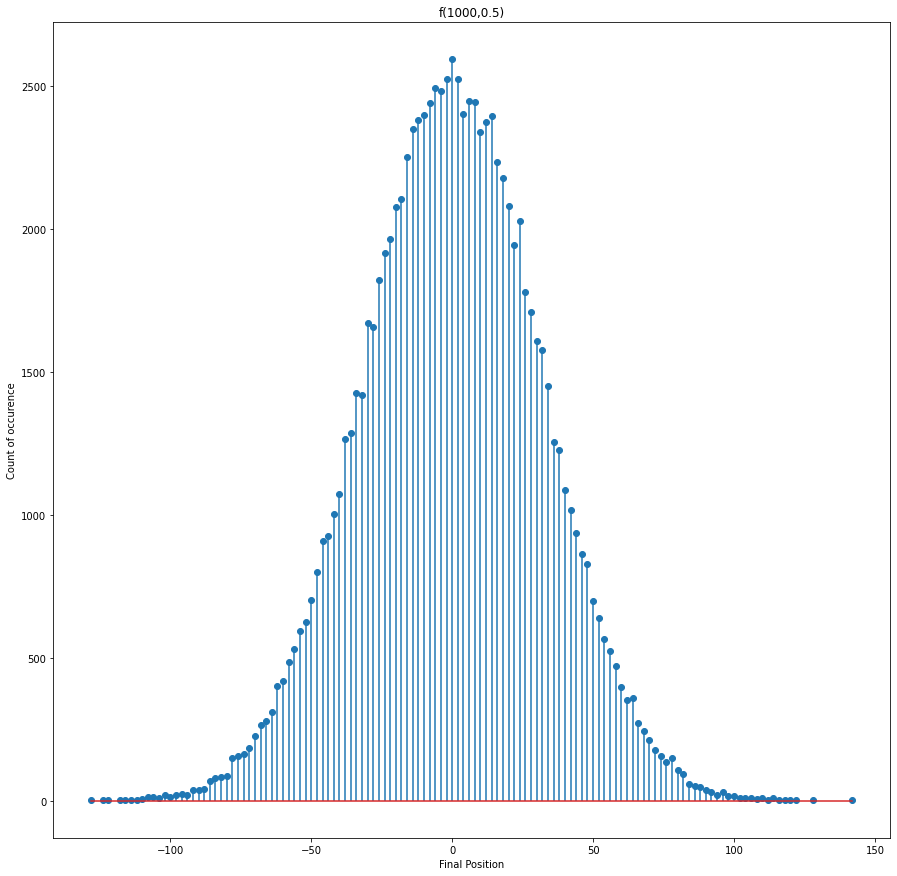

499.97748 0.0


In [141]:
def random_walk(n: int, p: float, SIM_TIMES: int, show: bool = False):
    # TODO: Complete the function
    # compute the binomial random variable using the given parameters and the above defined function

    X = np.random.binomial(n, p, SIM_TIMES)
    binom_rand = X * 2 - n

    experiment = np.unique(binom_rand, return_counts=True)

    # draw the histograms
    if show:
        plt.figure(figsize=(15, 15))
        plt.stem(experiment[0], experiment[1])
        plt.xlabel("Final Position")
        plt.ylabel("Count of occurence")
        plt.title(f"f({n},{p})")
        plt.show()

    # return the mean
    return np.mean(X)


n = 1000
SIM_TIMES = 100000
E = lambda n, p: n * (2 * p - 1)
# print(random_walk(n, 0.0, SIM_TIMES, True), E(n, 0.0))
# print(random_walk(n, 0.1, SIM_TIMES, True), E(n, 0.1))
# print(random_walk(n, 0.2, SIM_TIMES, True), E(n, 0.2))
# print(random_walk(n, 0.3, SIM_TIMES, True), E(n, 0.3))
# print(random_walk(n, 0.4, SIM_TIMES, True), E(n, 0.4))
print(random_walk(n, 0.5, SIM_TIMES, True), E(n, 0.5))
# print(random_walk(n, 0.6, SIM_TIMES, True), E(n, 0.6))
# print(random_walk(n, 0.7, SIM_TIMES, True), E(n, 0.7))
# print(random_walk(n, 0.8, SIM_TIMES, True), E(n, 0.8))
# print(random_walk(n, 0.9, SIM_TIMES, True), E(n, 0.9))
# print(random_walk(n, 1.0, SIM_TIMES, True), E(n, 1.0))


## [10 Marks] Part C : Result Interpretation

**Complete the function $\texttt{part\_3}$ such that given $p,\texttt{SIM\_TIMES}$ it computes $$\frac{2n}{(\text{Expected Distance from Origin})^2}$$ for $n=1000,2000,3000,\dots,100,000$
and draw a _line chart_ of the obtained values.**

**Then test the function on $p=0.5,\texttt{SIM\_TIMES} =10,000$ and write down anything interesting you notice about the graph.**


4.000007394966881


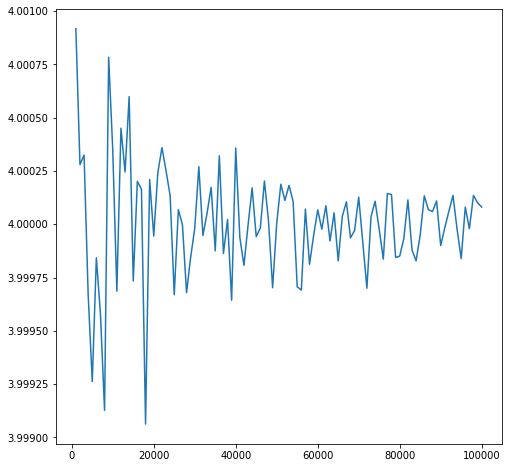

In [148]:
def part_3(p: float, SIM_TIMES: int):

    n_values = np.array([n for n in range(1000, 100001, 1000)])

    random_walk_vecFunc = np.vectorize(random_walk, otypes=[float])

    # edfo = np.array([random_walk_vecFunc(n_values, p, 100) for _ in range(SIM_TIMES)])
    edfo = random_walk_vecFunc(n_values, p, SIM_TIMES)

    # edfo = np.mean(edfo, axis=0, dtype=float)
    # print(edfo)
    # denom = edfo
    denom = np.abs(edfo)
    # denom = np.power(edfo, 2)

    # print(denom)

    ratio = (2 * n_values) / denom
    print(np.mean(ratio))
    plt.figure(figsize=(8, 8))
    plt.plot(n_values, ratio)
    plt.show()


part_3(0.5, 10000)


# [50 Marks] Task 2 : Maximum Likehlihood Estimation


## Theoretical Background

A common task in statistics is estimating a joint probability distribution
given a dataset. For example, suppose you have a sample of observations $(X)$ from a domain $(x_1, x_2, x_3, ⋯, x_n)$, and each observation is taken separately from the domain with the same probability distribution. Density estimation entails choosing a probability distribution function and the distribution's parameters that best describe the observed data's joint probability distribution $(X)$. Maximum a Posteriori (MAP), a Bayesian approach, and Maximum Likelihood Estimation (MLE), a frequentist approach, are the two most popular approaches to solving this problem. However, we will just be discussing MLE in this section.

Maximum Likelihood Estimation entails approaching the situation as an optimization or search problem, in which we seek a set of parameters that results in the best fit for the joint probability of the data sample ($X$).
In Maximum Likelihood Estimation, we wish to maximize the probability of observing the data from the joint probability distribution given a specific probability distribution and its parameters, stated formally as:

$$ P ( X \mid \theta) $$
where $\theta$ is the unknown parameter(s).

The resulting conditional probability is referred to as the likelihood of observing the data given the model parameters and is written using the notation $L()$ to denote the likelihood function. For example,
$$ L (X \mid \theta) $$

**Note :** Likelihood is defined as probability of the data given the model.

The objective of Maximum Likelihood Estimation is to find set of parameters $(\theta)$ that maximize the likelihood function.
$$ \text{ maximize } L ( X \mid \theta) $$

Given that the sample is comprised of $n$ examples, we can frame this as the joint probability of the observed data samples $x_1,x_2, \cdots, x_n$ given the Probability distribution parameters $(\theta)$:

$$ L (x_1, x_2, \cdots, x_n \mid \theta) $$

The joint probability distribution can be restated as the multiplication of the conditional probability for observing each example given the distribution parameters.

$$ P ( X | \theta) = P (x*1, x_2, \cdots, x_n \mid \theta) = \prod*{i=1}^{n} P(x_i | \theta) $$

Multiplying many small probabilities together can be numerically unstable in practice, therefore, it is common to restate this problem as the sum of the log conditional probabilities of observing each example given the model parameters.

$$ P ( X \mid \theta) = \sum\_{i=1}^{n} \log\left(P(x_i \mid \theta)\right) $$


## Example

Let's suppose our vocabulary has only two words i.e. $\{0,1\}$. In addition, suppose we are given the document $D = \{1100\}$. Furthermore, you are given two multinomial models $ A, B$ with parameters , $ A_0 = 0.2, A_1 = 0.8 ; B_0 = 0.4, B_1 = 0.6 $. Now you are required to find which model has most likely generated this document.

In order to find which model has most likely generated this document, we will compute the likelihood of both models for generating the given document and then choose the maximum likelihood.

$$ P( D | A ) = (0.2)^{2} \cdot (0.8)^{2} = 0.0256 $$
$$ P( D | B ) = (0.4)^{2} \cdot (0.6)^{2} = 0.0576 $$

Since $ P ( D | B) > P ( D | A) $, Model B has most likely generated this document.


## Task Overview

You will do MLE for Binomial distribution in Task 02, which has been split into four parts.

- In Part A, you are required to generate Binomial Random Numbers.
- In Part B, you are required to compute likelihood for the data generated in Part A.
- In Part C, you are required to compute maximum log likelihood to estimate the value of $p$.
- In Part D, you are required to provide reasoning based on your own understanding for the differences between the theoretical and estimated values of $p$.


## [10 Marks] Part A : Generate Binomial Random Numbers

**Complete the function $\texttt{generate\_random\_data}$ which generates a binomial random variable with parameters $(size,p,n)$ and plots the histogram of the distribution of simulation results.**

**The function $\texttt{generate\_random\_data}$ has already been called for you with $size=30$, $n=10$, and $p=0.5$**


[5 4 4 2 6 4 5 4 5 4 3 6 4 3 5 6 5 6 4 8 5 8 5 5 6 1 5 5 5 3]


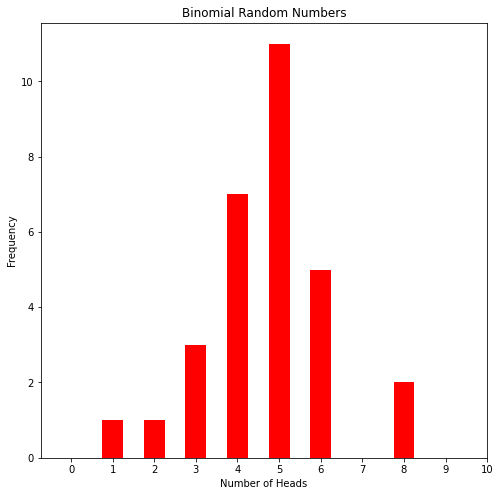

In [152]:
def generate_random_data(size: int, p: float, n: int):
    """
    size: The number of experiments
    p: Probability of success
    n: Number of trials in each experiment
    """
    np.random.seed(255)
    # Generating Random Binomial Numbers

    brn = np.random.binomial(n, p, size)

    # Print the generated random numbers

    print(brn)

    # Visualize the generated random number

    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(
        1,
        1,
        1,
    )
    n, bins, patches = ax.hist(
        brn, bins=n, range=(0, n), histtype="bar", rwidth=0.5, align="left", color="red"
    )

    plt.xticks(bins)
    plt.xlabel("Number of Heads")
    plt.ylabel("Frequency")
    plt.title("Binomial Random Numbers")
    plt.show()

    # return the generated Binomial Numbers
    return brn


X = generate_random_data(size=30, p=0.5, n=10)


[5 4 4 2 6 4 5 4 5 4 3 6 4 3 5 6 5 6 4 8 5 8 5 5 6 1 5 5 5 3]


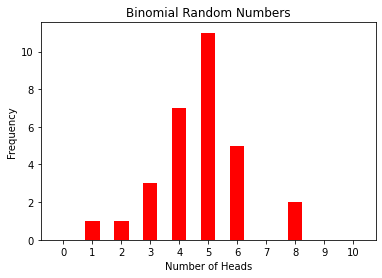

In [ ]:
# Do not edit.
X = generate_random_data(size=30, p=0.5, n=10)


## [10 Marks] Part B : Compute Likelihood

**Complete the function $\texttt{calculate\_likelihood}$ which computes the likelihood of $X$ given $p$ binomial with parameters $(p,X)$**

**The function $\texttt{calculate\_likelihood}$ has already been called for you with the data you simulated in Part A and $p=0.5$**

**You also are required to comment on the numerical nature of the value that was returned by the function $\texttt{calculate\_likelihood}$**


In [153]:
def calculate_likelihood(p, X):
    # TODO : Complete the function
    # create a random variable for 10 coin tosses with probability p using stasts.binom
    n = 10  # number of coin tosses
    coin = stats.binom

    # calculate the PMF of that random variable for values X.
    coinPMF = np.array([coin._pmf(x, n, p) for x in X])
    # return the product
    return np.prod(coinPMF)


# X = generate_random_data(size=30, p=0.5, n=10)
# Do not edit
calculate_likelihood(0.5, X)


1.4798580718218773e-24

## [20 Marks] Part C : Compute Maximum Log Likelihood

**In Part C, you will be completing the functions $\texttt{calculate\_log\_likelihood}$ and $\texttt{calculate\_maximum\_log\_likelihood}$.**

**The function $\texttt{calculate\_log\_likelihood}$ computes the log likelihood of $X$ given $p$ with parameters $(X,p)$. The function $\texttt{calculate\_maximum\_log\_likelihood}$ computes the maximum likelihood of the given data $X$ and plots a graph of log likelihood vs $p$ with parameters $(X)$.**

**The function $\texttt{calculate\_log\_likelihood}$ has already been called for you with the data you simulated in Part A**


In [154]:
# Calculating Likelihood
def calculate_log_likelihood(p, X):
    # TODO : Complete the function
    # create a binomial random variable with parameter 10 and probability p
    # n = 10  # number of coin tosses
    # coin = stats.binom
    # create a PMF of that random variable for X
    # coinPMF = np.array([coin._pmf(x, n, p) for x in X])
    # Calculate the log
    # logCoinPMF = np.log(coinPMF)
    # Calculate the summation
    return np.log(calculate_likelihood(p,X))
    # return np.sum(logCoinPMF)


calculate_log_likelihood(0.5, X)


-54.870096046097174

0.47035


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4452\3702172522.py:12: RuntimeWarning: divide by zero encountered in log
  return np.log(calculate_likelihood(p,X))


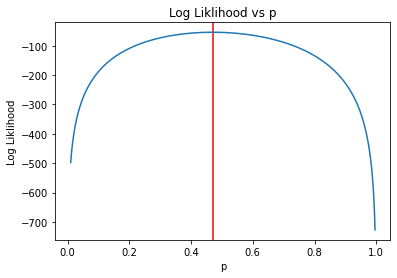

In [157]:
# Compute Maximum Likelihood
# left
def calculate_maximum_log_likelihood(X):
    # TODO : Complete the function

    x = np.linspace(0.01, 1, 1000, endpoint=False)

    # calculate the log likelihood for each value of x and store it in d[x]

    d = {i: calculate_log_likelihood(i, X) for i in x}

    maximumLog = -float("inf")
    maximum = None
    for x, logPi in d.items():
        if maximumLog < logPi:
            maximum = x
            maximumLog = logPi

    # plot the maximum Likelihood function using d
    # plt.figure(figsize=(8,8))
    plt.axvline(x=maximum, color="red")
    plt.plot(d.keys(), d.values())
    plt.xlim = 0, 1
    plt.ylim = -1000, 0
    plt.title("Log Liklihood vs p")
    plt.xlabel("p")
    plt.ylabel("Log Liklihood")

    return (maximum, d[maximum])


exp_p, mle = calculate_maximum_log_likelihood(X)
print(exp_p)


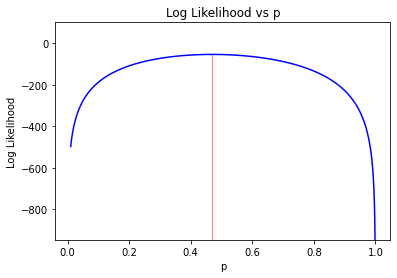

0.47035


In [ ]:
exp_p, mle = calculate_maximum_log_likelihood(X)
print(exp_p)


## [10 Marks] Part D : Comparision of the theoretical value of $p$ with the estimated value of $p$

**In this part, you are required to complete the code which plots the simulated the data, theoretical distribution and the actual distribution on the same plot. You are then required to comment on the distribution of the data generated and how it compares to the theoretical distribution and the estimated distrbution. Furthemore, you are required to provide reasoning based on your own understanding for the differences in the distributions and value of $p$.**


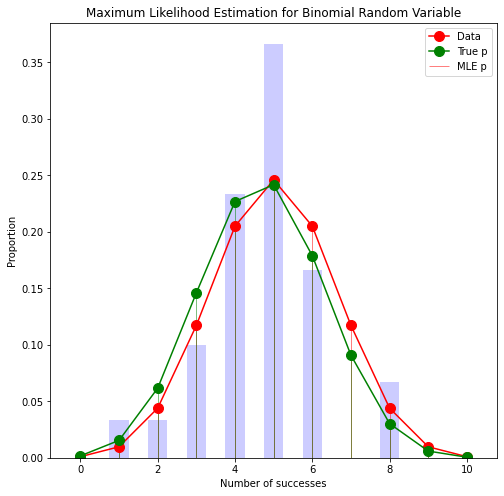

In [170]:
# TODO : Complete the Code Snippet
plt.figure(figsize=(8, 8))
# Plot Data
plt.hist(
    X,
    bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    rwidth=0.5,
    align="left",
    density=True,
    color="b",
    alpha=0.2,
)
n = 10
p = 0.5
# Plot theoretical distribution
rv = stats.binom  # create binomial rv for 10 coints with p=0.5
x = np.arange(n + 1)  # values which represent the number of heads
f = rv._pmf(x, n, p)  # f is the pmf of rv for values of x


plt.plot(x, f, "-ro", ms=10)
plt.vlines(x, 0, f, colors="r", lw=1, alpha=0.5)


# # Plot MLE Distribution
# rv = stats.binom  # create binomial rv for 10 coints with p=0.5 stats.binom(10,exp_p)
# x = np.arange(n + 1)  # values which represent the number of heads np.arange(11)
f = rv._pmf(x, n, exp_p)  # f is the pmf of rv for values of x

plt.plot(x, f, "-go", ms=10)
plt.vlines(x, 0, f, colors="g", lw=1, alpha=0.5)


# # Label, Title, Legend
plt.title("Maximum Likelihood Estimation for Binomial Random Variable")
plt.xlabel("Number of successes")
plt.ylabel("Proportion")
plt.legend([ "True p", "MLE p","Data"])


plt.show()


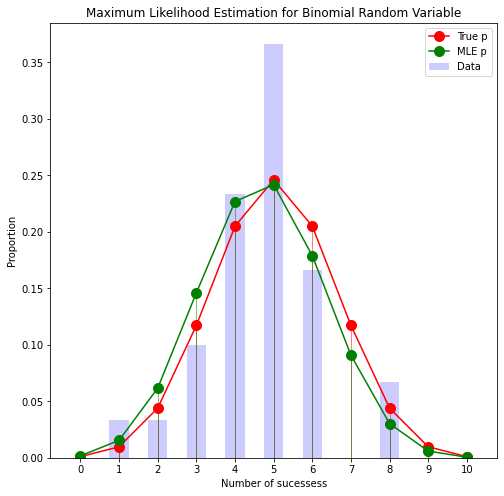

In [ ]:
# TODO : Complete the Code Snippet
plt.figure(figsize=(8,8))
# Plot Data
plt.hist(X,bins=[0,1,2,3,4,5,6,7,8,9,10,11], rwidth = 0.5, align = 'left', density=True, color="b", alpha=0.2);
n = 10
# Plot theoretical distribution
rv  =   # create binomial rv for 10 coints with p=0.5 
x =     # values which represent the number of heads
f =     # f is the pmf of rv for values of x

plt.plot(x, f,'-ro', ms=10);
plt.vlines(x, 0, f, colors="r", lw=1,alpha=0.5, label='_nolegend_')


# Plot MLE Distribution
rv  = # create binomial rv for 10 coints with p=0.5 stats.binom(10,exp_p)
x =   # values which represent the number of heads np.arange(11)
f =   # f is the pmf of rv for values of x

plt.plot(x, f,'-go', ms=10);
plt.vlines(x, 0, f, colors="g", lw=1,alpha=0.5, label='_nolegend_')


# Label, Title, Legend

plt.show()


# [10 Marks] Task 3 : Naive Bayes Classifier


## Bayes Theorem

In probability and statistics, Bayes Theorem describes the probability of an event based on prior knowledge of conditions that might be related to the event.

Mathematically, Bayes Theorem is given as follows,
$$ P(A \mid B) = \frac{P( B \mid A) \times P(A)}{P(B)} $$

where $P(A)$ is the prior probability and $P(A\mid B)$ is the posterior probability.


## Naive Bayes Classifier

The Naive Bayes Classifier is a classification algorithm based on **Bayes Theorem.**
The fundamental Naive Bayes assumption is that each feature makes an

- **Independent**
- **Equal**

contribution to the final outcome.

We can apply Bayes' theorem to a given dataset in the following way:

$$ P(y\mid X) = \frac{P(X\mid y) \times P(y)}{P(X)}$$

where $y$ is class variable and $X$ is a feature vector of size $n$ represented as $ X = (x_1, x_2,x_3, \cdots, x_n) $.

By subsituiting $X$, we obtain the following result:
$$ P(x*1,x_2,x_3,\cdots,x_n) = \prod*{i=1}^{n} P(x*i | x_1, \cdots,x*{i-1},y) $$

However, based on the Naive's Bayes assumption of independence we can simplify the above equation as follows:
$$ P(x*1,x_2,x_3,\cdots,x_n) = \prod*{i=1}^{n} P(x*i | y) $$
Consequently, the original equation can be expressed as 
$$ P(y|x_1,x_2,x_3,\cdots,x_n) = \frac{\prod*{i=1}^{n} P(x_i | y) P(y)}{P(x_1),\cdots,P(x_n)} $$

Furthemore, the denominator is a constant so we can leave it out.
$$ P(y|x*1,x_2,x_3,\cdots,x_n) \propto P(y) \prod*{i=1}^{n} P(x_i | y)$$

Finally, our classifier model is given as follows:

$$ y = \arg \max*{k \in \{1,\cdots,K\}} P(C_k) \prod*{i=1}^{n} P(x_i | C_k) $$
where $P(C_k)$ is the class probability.


**Note:**
The Naive Bayes is easy to implement and fast to predict the class of the test data set. It also performs well in multi-class prediction. However, If categorical variable has a category (in test data set), which was not observed in training data set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as Zero Frequency. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.


## Task Overview

This task has been sub divided into two parts.

- In Part A, you will compute predictions on a small scale data using Naive Bayes classifier given some input features.
- In Part B, you are to go over through the code that implements a Naive Bayes Classifer and relate the diffrent functions to the steps that you took in Part A. (**You are not required to implement anything Part B**)


## [8 Marks] Part A : Play Cricket

**Consider a fictional dataset that describes the weather conditions for a game of cricket. Based on the meteorological conditions, each tuple classifies the weather as appropriate or unfit for playing cricket. Your task is to learn a Nave Bayes model that predicts whether or not it is safe to play cricket given the current weather conditions.**


| Weather | Temperature | Humidity | Windy | Label |
| ------- | ----------- | -------- | ----- | ----- |
| Clear   | Hot         | High     | No    | No    |
| Clear   | Hot         | High     | Yes   | No    |
| Cloudy  | Hot         | High     | No    | Yes   |
| Raining | Mild        | High     | No    | Yes   |
| Raining | Cold        | Normal   | No    | Yes   |
| Raining | Cold        | Normal   | Yes   | No    |
| Cloudy  | Cold        | Normal   | Yes   | Yes   |
| Clear   | Mild        | High     | No    | No    |
| Clear   | Cold        | Normal   | No    | Yes   |
| Raining | Mild        | Normal   | No    | Yes   |
| Clear   | Mild        | Normal   | Yes   | Yes   |
| Cloudy  | Mild        | High     | Yes   | Yes   |
| Cloudy  | Hot         | Normal   | No    | Yes   |
| Raining | Mild        | High     | Yes   | No    |


### [4 Marks] Part I : Probability $(X \mid y)$

**Based on the dataset, fill in the missing values in the table below.**


| Label       | Yes                 | No                 |
|-------------|---------------------|--------------------|
| Weather     | P(Weather\|Yes)     | P(Weather\|No)     |
| Clear       |  2/9                |  3/5               |
| Cloudy      | 4/9                 |  0                 |
| Raining     | 3/9                 |  2/5               |
| Temperature | P(Temperature\|Yes) | P(Temperature\|No) |
| Hot         |  2/9                |  2/5               |
| Mild        |  4/9                |  2/5               |
| Cold        |  3/9                |  1/5               |
| Humidity    | P(Humidity\|Yes)    | P(Humidity\|No)    |
| High        |  3/9                |  4/5               |
| Normal      |  6/9                |  1/5               |
| Windy       | P(Windy\|Yes)       | P(Windy\|No)       |
| Yes         |  3/9                |  3/5               |
| No          |  6/9                |  2/5               |


### [4 Marks] Part II : Compute Predictions

**Based on the given weather conditions and Part I, compute the prediction. (No marks given to answers without explanation)**


| Weather | Temperature | Humiditiy | Windy | Label |
| ------- | ----------- | --------- | ----- | ----- |
| Raining | Hot         | High      | No    | No    |


Explanation.

We know the formula:
$$ y = {\arg \max}_{\{k \in  1,\cdots,K \}} P(C_k) \prod_{i=1}^{n} P(x_i | C_k) $$
where $P(C_k)$ is the class probability. Here in the case $k \in Yes,No$ for Label. Now, the formula will be. 

$$ y = {\arg \max}_{\{k \in Yes, No \}} P(C_k) \cdot P(Weather = Raining| C_k) \cdot P(Temperature = Hot| C_k) \cdot P(Humidity = High| C_k) \cdot P(Windy = No| C_k)$$ 
 - K = Yes.
$$ y_{(Yes)} = P(Yes) \cdot P(Weather = Raining| Yes) \cdot P(Temperature = Hot| Yes) \cdot P(Humidity = High| Yes) \cdot P(Windy = No| Yes)$$
$$ y_{(Yes)} = (9/14) \cdot (3/9) \cdot (2/9) \cdot (3/9) \cdot (6/9) = 0.0106$$ 

 - K = No.
$$ y_{(No)} = P(No) \cdot P(Weather = Raining| No) \cdot P(Temperature = Hot| No) \cdot P(Humidity = High| No) \cdot P(Windy = No| No)$$
$$ y_{(No)} = (5/14) \cdot (2/5) \cdot (2/5) \cdot (4/5) \cdot (2/5) = 0.0183$$ 

No we have to Normalize this, because these are equivalence probabilities and we had already removed the denominator term.
 
$y_{(Yes)} = \dfrac{y_{(Yes)}}{y_{(Yes)} + y_{(No)}} = 0.3667$

$y_{(No)} = \dfrac{y_{(No)}}{y_{(Yes)} + y_{(No)}} = 0.633$

After applying the ${ \arg \max}$, we see that the probability of $y_{(No)} > y_{(Yes)}$ ... Results -->> Not Playing Cricket ---> Label = No

| Weather | Temperature | Humidity | Windy | Label |
| ------- | ----------- | -------- | ----- | ----- |
| Cloudy  | Cold        | Normal   | Yes   | Yes   |


Explanation.

We know the formula:
$$ y = {\arg \max}_{\{k \in  1,\cdots,K \}} P(C_k) \prod_{i=1}^{n} P(x_i | C_k) $$
where $P(C_k)$ is the class probability. Here in the case $k \in Yes,No$ for Label. Now, the formula will be. 

$$ y = {\arg \max}_{\{k \in Yes, No \}} P(C_k) \cdot P(Weather = Cloudy| C_k) \cdot P(Temperature = Cold| C_k) \cdot P(Humidity = Normal| C_k) \cdot P(Windy = Yes| C_k)$$ 
 - K = Yes.
$$ y_{(Yes)} = P(Yes) \cdot P(Weather = Cloudy| Yes) \cdot P(Temperature = Cold| Yes) \cdot P(Humidity = Normal| Yes) \cdot P(Windy = Yes| Yes)$$
$$ y_{(Yes)} = (9/14) \cdot (4/9) \cdot (3/9) \cdot (6/9) \cdot (3/9) = 0.0212$$ 

 - K = No.
$$ y_{(No)} = P(No) \cdot P(Weather = Cloudy| No) \cdot P(Temperature = Cold| No) \cdot P(Humidity = Normal| No) \cdot P(Windy = Yes| No)$$
$$ y_{(No)} = (5/14) \cdot (0) \cdot (1/5) \cdot (1/5) \cdot (3/5) = 0 $$ 

No we have to Normalize this, because these are equivalence probabilities and we had already removed the denominator term.
 
$y_{(Yes)} = \dfrac{y_{(Yes)}}{y_{(Yes)} + y_{(No)}} = 1$

$y_{(No)} = \dfrac{y_{(No)}}{y_{(Yes)} + y_{(No)}} = 0 $

After applying the ${ \arg \max}$, we see that the probability of $y_{(No)} > y_{(Yes)}$ ... Results -->> Playing Cricket ---> Label = Yes

### [2 Marks] Part B : Text Classification

**Part B is the continuation of the work you completed in Part A. In this section, we have provided all the required implementation of a classification model.**

**First the functions for loading and preprocessing data are implemented.
Then the functions to learn model and to categorize are also implemented.  
The dataset that you will be using TextClassification_Data.csv which has been already loaded for you.**

**Your task is to read and try to understand the following process. You will have provide a 30 second explaination in viva.**


In [ ]:
# Load Dataset
def load_file(fileName):
    """
    fileName: The name of the file which needs to be loaded.
    Load csv file into a pandas dataframe.
    """
    dataset = pd.read_table(fileName, header=0, sep=",", encoding="unicode_escape")
    return dataset


# Preprocess Data
def preprocess(data):
    """
    data: Dataset which needs to be pre-processed.
    Creates the term frequency matrix for the review data set.
    """
    # https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html (Please see this if you need any help)
    count_vectorizer = CountVectorizer()
    data = count_vectorizer.fit_transform(data)
    return data


In [ ]:
# Learn Model
def learn_model(data, target):
    """
    data: Feature Vector (Matrix)
    target: Training Labels
    Returns the trained model which is a tuple consisting of
    P(X|y) (Probabilities of each feature given class y)
    P(Y) (Probability of each class)
    """
    # Initialize the model
    model = None
    # Convert the data into a numpy array using the toarray() method
    Array = data.toarray()
    # Store the dimensions of the array into array_row,array_col
    array_row, array_col = Array.shape
    # Get a list of all the unique classes from target
    Y = list(np.unique(target))
    # Initialize X_given_C
    # P (X | C) (Probability of features given class y)
    X_given_y = np.zeros((len(Y), array_col))
    # Initialize the list to store probability of each particular class
    # P(C)
    Probability = [0] * len(Y)
    # Traverse through each class
    for index in range(len(Y)):
        # Subsetting the rows belonging to a particular class.
        temp = Array[target == Y[index]]
        # Store the dimensions of Temp Array.
        class_row, class_col = temp.shape
        X_given_y[index] = np.sum(temp, axis=0)
        # Peform Lapalace Estimation by adding 1 so that none of the feature has a probability of zero for a given class.
        X_given_y[index] += 1
        Sum_Y_given_C = np.sum(X_given_y[index])
        # P(X|y) -> Probabilitity of each feature given class Y.
        X_given_y[index] = X_given_y[index] / Sum_Y_given_C
        # P(y) -> Probability of each Class
        Probability[index] = class_row / array_row
    # Create a series with Class Labels as the index and the probability as values.
    Class_Probability = pd.Series(Probability, Y)
    # Create model
    model = (X_given_y, Class_Probability)
    return model


In [ ]:
# Compute Prediction
def classify(model, testdata):
    # Initialize list to store predicted Label.
    Predicted_val = []
    # Probability of features given class Y.
    P_given_C = model[0]
    # Probability of each class along with class label.
    Class_Probability = model[1]
    Classes = Class_Probability.index
    # Convert test data to numpy array.
    TestArray = testdata.toarray()
    # Store the dimension of the TestArray in the variables ArrayRow,ArrayCol
    ArrayRow, ArrayCol = TestArray.shape
    # Loop through each dataset
    for i in range(ArrayRow):
        # Initialize Probabilites list with zero to store probability for each class.
        Probabilities = [0] * len(Classes)
        # Compute the probability for each class given data
        for j in range(len(Classes)):
            # Extract those features which are present in the dataset instance and multiply their probabilities.
            # Probabilities can be extracted from P_given_C
            Probabilities[j] = (
                Class_Probability[Classes[j]]
                * P_given_C[j][TestArray[i].astype(bool)].prod()
            )
        # Store the computed probabilities in a series
        temp_series = pd.Series(Probabilities, Classes)
        # Predicted label is the class with the highest probability.
        Predicted_val.append(temp_series.idxmax())
    # Return list of predicted labels.
    return Predicted_val


In [ ]:
# DO NOT EDIT
features = ["SUMMARY", "categories", "sub_categories"]
# Load Dataset
print("Loading data.....")
dataset = load_file("TextClassification_Data.csv")
data, target = dataset[features[0]].fillna(" "), dataset[features[1]]

# Pre process Dataset
print("preprocessing data.....")
word_vectors = preprocess(data)

# Split Data into train & test Data
print("Train & Test split....")
trainingX, testX, trainingY, testY = train_test_split(
    word_vectors, target, test_size=0.4, random_state=43
)

# Train Model
print("Learning model.....")
# Uncomment the below two lines (Sklearn Implementation of Naive Bayes) to check if your code is performing correctly.
# classifier = BernoulliNB()
# classifier.fit(trainingX,trainingY)
model = learn_model(trainingX, trainingY)

# Compute Prediction
print("Classifying test data......")
# Uncomment the below line to compute predictions using sklearn model and verify your results.
# predictedY = classifier.predict(testX)
predictedY = classify(model, testX)

# Evaluate Results
print("Evaluating results.....")
print(metrics.accuracy_score(testY, predictedY))


Loading data.....
preprocessing data.....
Train & Test split....
Learning model.....
Classifying test data......
Evaluating results.....
0.7048271648044693


# **Note: Task 4 is a bonus Question and should only be attempted if all the other tasks have been completed.**


# [0 Marks] Task 4 : Bayesian Updating


## Bayesian Updating

The Bayesian keeps on updating their beliefs based on the events that they see. For example a Bayesian might initially holds the belief that the moon comes out every night with a probability of 1/2. As more nights pass, they see the moon a lot more, and their beliefs start to change becoming closer to reality.

This is extremely intuitive. For example, assume that a pharmaceutical company makes a medicine and claims that it is 90% effective. You see it in action and find it failing more times than succeeding. You would update your beliefs appropriately.

This question is supposed to simulate the concept of Bayesian updating.

$$P(H|D) = \frac{P(D|H) P(H)}{P(D)}$$

$H$ is the hypothesis (our belief about the distribution). $D$ is the data. $P(D)$ can be computed by the total probability rule.


## Example

Shayan, a TA of the course attempts to play a game with you. He says that he has 2 types of coin. One coin is fair. The other is biased (80% of the time it shows up heads and 20% of the time it shows tails)

He tells you that he would fairly chose one of these coins (50% probability of choosing each)

Imagine that you get a tails. Intuitively, we would believe that now that the coin is likely to be fair

$$P(\text{Fair}\mid \text{Tails}) = P(\text{Tails} \mid  \text{Fair}) \times P(\text{Fair}) = 0.5\times 0.5 = 0.25$$
$$P(\text{Biased} \mid Tails) = P(\text{Tails} \mid \text{Biased}) \times P(\text{Biased}) = 0.2\times 0.5 = 0.1$$

Therefore our revised beliefs are that the fair coin occurs with probability
$$\frac{0.25}{0.35}= \frac{5}{7}$$
and the biased coin with probability
$$\frac{0.1}{0.35}= \frac{2}{7}$$

This reflects reality more.


## Task Overview

**Your goal is to implement this same situation in code. You are given the functions $\texttt{biased\_coin}$ and $\texttt{fair\_coin}$ to simulate the coin Shayan uses. You are also given a function $\texttt{normalize}$ which takes a dictionary of probability and normalizes them such that the probability sums up to 1.You start of with a dictionary containing your current beliefs, initialized to 0.5 each reflecting the statement of Shayan. Based on the coin flips, update them and at the end, output your final beliefs.**


In [ ]:
# DO NOT EDIT
def biased_coin():
    return np.random.choice(2, p=[0.2, 0.8])


def fair_coin():
    return np.random.choice(2, p=[0.5, 0.5])


In [ ]:
# DO NOT EDIT
def normalise(current_beliefs):
    total = sum(current_beliefs.values())
    for i in current_beliefs:
        current_beliefs[i] /= total


In [ ]:
beliefs = {"fair":0.5,"biased":0.5}
# Toss n times
n = 10
coin_tosses = [fair_coin() for _ in range(n)]
current_beliefs = {"fair":0.5,"biased":0.5}

for flip in coin_tosses:
  # TODO: Implement what needs to be done for each coin flip
print(current_beliefs)

{'fair': 0.6995468959763333, 'biased': 0.30045310402366665}
